In [1]:
from google.colab import files
uploaded = files.upload()

Saving Test.csv to Test.csv


In [10]:
# 1. Считайте DataFrame
import pandas as pd
df = pd.read_csv("Test.csv")

In [11]:
# 2. Проведите анализ DataFrame
# - Какая размерность данных?
# - Какие типы переменных представленны в наборе данных?
# - Есть пропуски в данных? Если да, удалите строки, в которых есть пропуски
print('Размерность:')
print(df.shape)
print('Типы данных:')
print(df.dtypes)
print('Строки с пропусками:')
print(df.isna().sum())
df = df.dropna(axis=0, how='any')
print('После очистки:')
print(df.isna().sum())

Размерность:
(2627, 11)
Типы данных:
ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object
Строки с пропусками:
ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64
После очистки:
ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64


In [12]:
# 3. Написать фукнцию, которая принимает DataFrame, название Profession (Healthcare, Engineer и т д)
# и возвращает кортеж (средний возраст для этого типа Profession, максимальный возраст для этого типа Profession, (сколько мужчин, сколько женщин))
# т е для последний элемент тоже кортеж
def func(df, prof):
  df2 = df[df['Profession'] == prof]
  srt = (
      df2['Age'].mean(),
      df2['Age'].max(),
      (df2[df['Gender'] == 'Male'].shape[0], df2[df['Gender'] == 'Female'].shape[0])
  )
  return srt
func(df, 'Engineer')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


(40.23076923076923, 73, (44, 151))

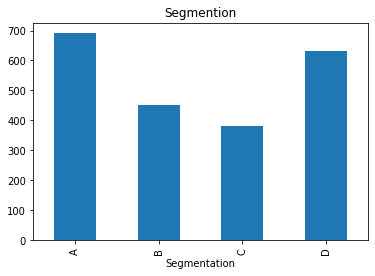

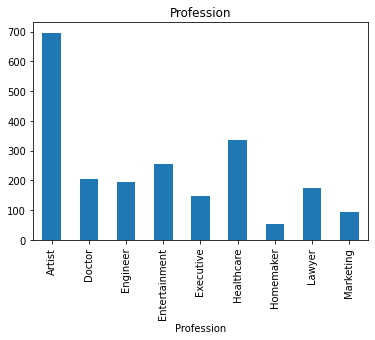

In [13]:
# 4. Построить график:
# - гистограмма распределения количества записей для каждого типа Segmentation
# - гистограмма распределения количества записей для каждого типа Profession
# Графики располагаются на разных плоскостях
# У графика должен быть заголовок, подписаны оси, а также легенда (т е графики должны быть подписаны)
import matplotlib.pyplot as plt
df.groupby('Segmentation')['ID'].nunique().plot(kind='bar', title='Segmention')
plt.show()
df.groupby('Profession')['ID'].nunique().plot(kind='bar', title='Profession')
plt.show()

In [14]:
# 5. Создайте новый столбец в DataFrame, в котором будет число из столбца Var_1
# Var_1  |  New_col
# Cat_4  |     4
df['New_col'] = [int(str(x)[4:]) if len(str(x)) > 4 else 0 for x in df['Var_1']]
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,New_col
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B,6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A,6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B,6
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4,C,4
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6,D,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2621,467950,Female,No,35,Yes,Entertainment,1.0,Low,2.0,Cat_6,D,6
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B,6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A,6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C,4


In [15]:
# 6. Замените в столбце Gender: Male = 0, Female = 1 (т е категории на числа)
df.loc[df['Gender'] == 'Female', 'Gender'] = 1
df.loc[df['Gender'] == 'Male', 'Gender'] = 0
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,New_col
0,458989,1,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B,6
1,458994,0,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A,6
3,459000,0,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B,6
5,459003,0,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4,C,4
6,459005,0,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6,D,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2621,467950,1,No,35,Yes,Entertainment,1.0,Low,2.0,Cat_6,D,6
2622,467954,0,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B,6
2623,467958,1,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A,6
2625,467961,0,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C,4
